# Experiment 9: Implement a program that performs fuzzy centroid defuzzification to convert a fuzzy set into a crisp value.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def fuzzy_centroid(x, y, mf):
  numerator = np.sum(x * y * mf)
  denominator = np.sum(y * mf)
  return numerator / denominator
def plot_fuzzy_set(x, mf):
  plt.plot(x, mf, '-r')
  plt.xlabel('x')
  plt.ylabel('Membership degree')
  plt.title('Fuzzy Set')
  plt.show()
def main():
  x = np.linspace(0, 10, 100)
  mf = np.exp(-0.5 * (x - 5)**2)
  plot_fuzzy_set(x, mf)
  crisp_value = fuzzy_centroid(x, mf, mf)
  print("Crisp value:", crisp_value)

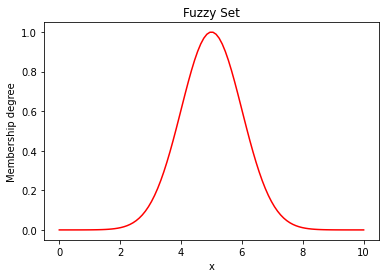

Crisp value: 4.999999999999999


In [2]:
if __name__ == '__main__':
  main()

# Experiment 10: Implement a program that performs fuzzy clustering on a set of data points and outputs the membership degrees for each data point in each cluster.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2)**2))

def initialize_clusters(X, K):
  return X[np.random.choice(X.shape[0], K, replace=False), :]

def update_membership_degrees(X, centers):
  m = X.shape[0]
  K = centers.shape[0]
  U = np.zeros((m, K))
  for i in range(m):
    x = X[i, :]
    d = [euclidean_distance(x, centers[j, :]) for j in range(K)]
    for j in range(K):
      U[i, j] = 1 / np.sum([d[j] / d[k] for k in range(K)])
  return U

def update_cluster_centers(X, U):
  m, n = X.shape
  K = U.shape[1]
  centers = np.zeros((K, n))
  for j in range(K):
    numerator = np.sum(U[:, j].reshape(-1, 1) * X, axis=0)
    denominator = np.sum(U[:, j])
    centers[j, :] = numerator / denominator
  return centers

def fuzzy_c_means(X, K, tol=1e-4, max_iter=100):
  centers = initialize_clusters(X, K)
  for i in range(max_iter):
    U = update_membership_degrees(X, centers)
    centers_prev = centers.copy()
    centers = update_cluster_centers(X, U)
    if np.allclose(centers, centers_prev, atol=tol):
      break
  return U

<ipython-input-1-1391929bf9b3>:18: RuntimeWarning: invalid value encountered in double_scalars
  U[i, j] = 1 / np.sum([d[j] / d[k] for k in range(K)])
<ipython-input-1-1391929bf9b3>:18: RuntimeWarning: divide by zero encountered in double_scalars
  U[i, j] = 1 / np.sum([d[j] / d[k] for k in range(K)])


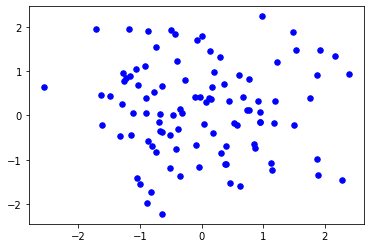

In [2]:
def plot_fuzzy_clusters(X, U):
  m, n = X.shape
  K = U.shape[1]
  colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
  for k in range(K):
    xk = X[np.argmax(U, axis=1) == k, :]
    plt.scatter(xk[:, 0], xk[:, 1], s=30, c=colors[k % len(colors)])
  plt.show()

def main():
  np.random.seed(0)
  K = 3
  X = np.random.randn(100, 2)
  U = fuzzy_c_means(X, K)
  plot_fuzzy_clusters(X, U)

if __name__ == '__main__':
  main()

# Experiment 11: Implement a recommender system that suggests items to users based on their previous preferences and behavior, using fuzzy logic.

In [7]:
import numpy as np
import pandas as pd
import math

# Define the fuzzy membership function for the "like" variable
def like_membership(value):
  if value >= 0 and value <= 2.5:
    return 0
  elif value > 2.5 and value <= 5:
    return (value - 2.5) / (5 - 2.5)
  elif value > 5 and value <= 7.5:
    return 1
  elif value > 7.5 and value <= 10:
    return (10 - value) / (10 - 7.5)
  else:
    return 0

# Define the fuzzy membership function for the "dislike" variable
def dislike_membership(value):
  if value >= 0 and value <= 2.5:
    return 1
  elif value > 2.5 and value <= 5:
    return (5 - value) / (5 - 2.5)
  elif value > 5 and value <= 7.5:
    return 0
  elif value > 7.5 and value <= 10:
    return (value - 7.5) / (10 - 7.5)
  else:
    return 0

In [12]:
# Load the sample data
data = {
    'item': ['Popular Science', 'Classic', 'Horror','Fiction'],
    'user1': [8, 5, 6, 9],
    'user2': [3, 7, 4, 1],
    'user3': [6, 2, 5, 8],
    'user4': [9, 7, 8, 2]
}

df = pd.DataFrame(data)

# Calculate the membership degrees for each user and item
for i in range(1, 5):
  user_column = 'user' + str(i)
  like_values = []
  dislike_values = []
  for j in range(len(df)):
    like_values.append(like_membership(df[user_column][j]))
    dislike_values.append(dislike_membership(df[user_column][j]))
  df['like_user' + str(i)] = like_values
  df['dislike_user' + str(i)] = dislike_values
    
# Find the recommended items for each user
for i in range(1, 5):
  user_like_column = 'like_user' + str(i)
  user_dislike_column = 'dislike_user' + str(i)
  recommendations = []
  for j in range(len(df)):
    item_like_value = df[user_like_column][j]
    item_dislike_value = df[user_dislike_column][j]
    if item_like_value > item_dislike_value:
      recommendations.append(df['item'][j])
  print("User " + str(i) + " recommendations: " + str(recommendations))

User 1 recommendations: ['Popular Science', 'Classic', 'Horror']
User 2 recommendations: ['Classic', 'Horror']
User 3 recommendations: ['Popular Science', 'Horror', 'Fiction']
User 4 recommendations: ['Classic', 'Horror']
